In [2]:
import numpy as np
import scipy as sp 
import matplotlib.pyplot as plt
%matplotlib inline

import mpfit
from utility.plotting import prettyplot
from utility.plotting import prettycolors

In [5]:
import tophat_fibcoll_corr_test as tophat

In [6]:
prettyplot()
pretty_colors = prettycolors()

In [7]:
# import P(k) data 
k, p0k, p2k = np.loadtxt('POWER_Q_CutskyN1.fidcosmo.dat.grid360.P020000.box3600', unpack=True, usecols=[0,1,2])

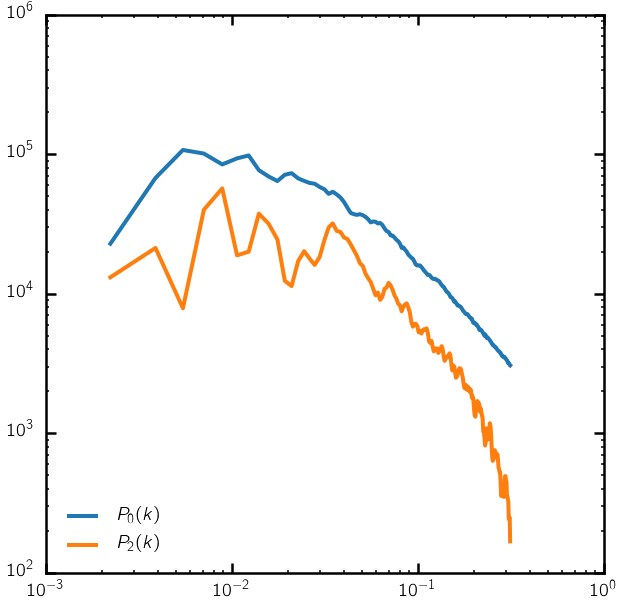

In [8]:
# plot P(k) data
fig = plt.figure(figsize=(10,10))
sub = fig.add_subplot(111)

sub.plot(k, p0k, label=r"$P_0(k)$", c=pretty_colors[1], lw=4)
sub.plot(k, p2k, label=r"$P_2(k)$", c=pretty_colors[3], lw=4)

sub.set_xlim([1e-3, 1.0])
sub.set_xlabel(r"\mathtt{k}")
sub.set_xscale('log')
sub.set_yscale('log')
sub.legend(loc='lower left')
plt.show()

## $P(k > k_{max})$ Extrapolation 
Model: 
$$P(k > k_{max}) = \alpha \left(\frac{k}{0.3}\right)^n$$
where $k_{max} \sim 0.25$

In [9]:
def pk_powerlaw(param, fjac=None, x=None, y=None): 
    '''
    P(k) = alpha * k^n 
    
    param = [alpha, n]
    '''
    model = param[0] * (x/0.3)**param[1]
    status = 0 
    return([status, y-model])

## Determining best fit parameters $\alpha$ and $n$

For Monopole: 

In [10]:
def pk_bestfit(k_in, pk_in, k_max=0.25, quiet=True): 
    
    fit_range = np.where(k_in > k_max)
    
    fa = {'x': k_in[fit_range], 'y': pk_in[fit_range]}
    param_guess = [pk_in[-1], -2.]
    bestfit = mpfit.mpfit(pk_powerlaw, param_guess, functkw=fa, quiet=quiet)
    
    alpha = bestfit.params[0]
    n = bestfit.params[1]
    return alpha, n


In [11]:
for k_test in np.arange(0.2, 0.325, 0.025): 
    alph, nn = pk_bestfit(k, p0k, k_max=k_test)
    print 'Bestfit Parameters for ', k_test, '< k < ', k[-1], ':'
    print 'alpha = ', alph, ' n = ', nn
    

Bestfit Parameters for  0.2 < k <  0.314164 :
alpha =  3345.65618166  n =  -1.56292565105
Bestfit Parameters for  0.225 < k <  0.314164 :
alpha =  3346.07284462  n =  -1.56046024851
Bestfit Parameters for  0.25 < k <  0.314164 :
alpha =  3347.82784716  n =  -1.53975372836
Bestfit Parameters for  0.275 < k <  0.314164 :
alpha =  3344.02693794  n =  -1.61082164981
Bestfit Parameters for  0.3 < k <  0.314164 :
alpha =  3372.16084374  n =  -2.05472573121


`rank` is deprecated; use the `ndim` attribute or function instead. To find the rank of a matrix see `numpy.linalg.matrix_rank`.
`rank` is deprecated; use the `ndim` attribute or function instead. To find the rank of a matrix see `numpy.linalg.matrix_rank`.
`rank` is deprecated; use the `ndim` attribute or function instead. To find the rank of a matrix see `numpy.linalg.matrix_rank`.
`rank` is deprecated; use the `ndim` attribute or function instead. To find the rank of a matrix see `numpy.linalg.matrix_rank`.
`rank` is deprecated; use the `ndim` attribute or function instead. To find the rank of a matrix see `numpy.linalg.matrix_rank`.


`rank` is deprecated; use the `ndim` attribute or function instead. To find the rank of a matrix see `numpy.linalg.matrix_rank`.
`rank` is deprecated; use the `ndim` attribute or function instead. To find the rank of a matrix see `numpy.linalg.matrix_rank`.
`rank` is deprecated; use the `ndim` attribute or function instead. To find the rank of a matrix see `numpy.linalg.matrix_rank`.
`rank` is deprecated; use the `ndim` attribute or function instead. To find the rank of a matrix see `numpy.linalg.matrix_rank`.
`rank` is deprecated; use the `ndim` attribute or function instead. To find the rank of a matrix see `numpy.linalg.matrix_rank`.


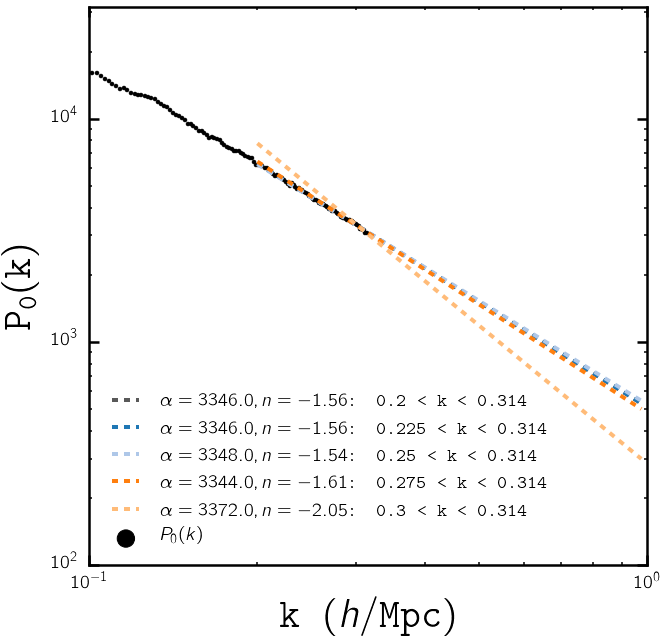

In [12]:
# plot P(k) data
fig2 = plt.figure(2, figsize=(10,10))
sub = fig2.add_subplot(111)

for i_test, k_test in enumerate(np.arange(0.2, 0.325, 0.025)): 
    alph, nn = pk_bestfit(k, p0k, k_max=k_test)
    
    xarr = np.arange(0.2, 1.0, 0.025)
    sublabel = r"$\alpha = "+str(round(alph))+", n="+str(round(nn,2))+"$"+''.join([': ', str(round(k_test,3)), ' < k < ', str(round(k[-1],3))])

    sub.plot(
        xarr, 
        alph * (xarr/0.3)**nn, 
        lw=4, 
        ls='--', 
        c=pretty_colors[i_test], 
        label= sublabel
    )

sub.scatter(k, p0k, label=r"$P_0(k)$", color='k', s=12)

sub.set_xlim([1e-1, 1.0])
sub.set_ylim([10**2, 10**4.5])
sub.set_xscale('log')
sub.set_yscale('log')
sub.set_ylabel('$\mathtt{P_0(k)}$', fontsize=40)
sub.set_xlabel('$\mathtt{k}\;\; (h/\mathtt{Mpc})$', fontsize=40)
sub.legend(loc='lower left', scatterpoints=1)
plt.show()

For Quadrupole

`rank` is deprecated; use the `ndim` attribute or function instead. To find the rank of a matrix see `numpy.linalg.matrix_rank`.
`rank` is deprecated; use the `ndim` attribute or function instead. To find the rank of a matrix see `numpy.linalg.matrix_rank`.
`rank` is deprecated; use the `ndim` attribute or function instead. To find the rank of a matrix see `numpy.linalg.matrix_rank`.
`rank` is deprecated; use the `ndim` attribute or function instead. To find the rank of a matrix see `numpy.linalg.matrix_rank`.
`rank` is deprecated; use the `ndim` attribute or function instead. To find the rank of a matrix see `numpy.linalg.matrix_rank`.


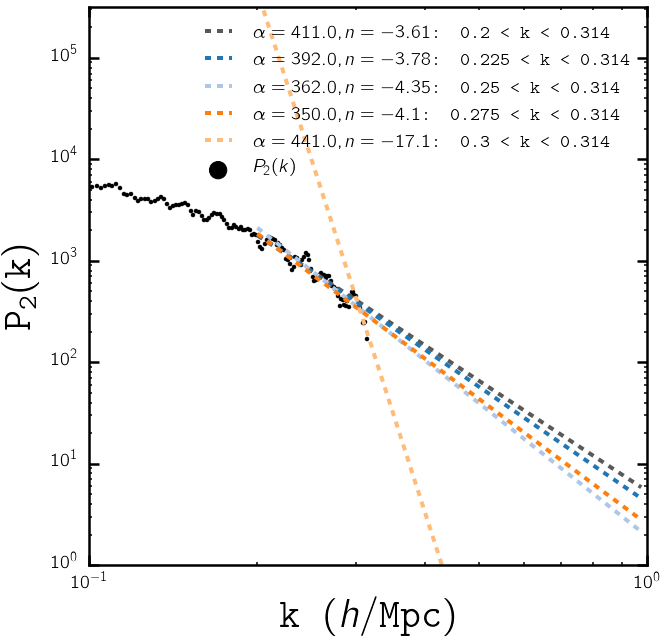

In [13]:
# plot P(k) data
fig2 = plt.figure(2, figsize=(10,10))
sub = fig2.add_subplot(111)

for i_test, k_test in enumerate(np.arange(0.2, 0.325, 0.025)): 
    alph, nn = pk_bestfit(k, p2k, k_max=k_test)
    
    sublabel = r"$\alpha = "+str(round(alph))+", n="+str(round(nn,2))+"$"+''.join([': ', str(round(k_test,3)), ' < k < ', str(round(k[-1],3))])
    xarr = np.arange(0.2, 1.0, 0.025)

    sub.plot(
        xarr, 
        alph * (xarr/0.3)**nn, 
        lw=4, 
        ls='--', 
        c=pretty_colors[i_test], 
        label= sublabel
    )

sub.scatter(k, p2k, label=r"$P_2(k)$", color='k', s=12)

sub.set_xlim([1e-1, 1.0])
sub.set_ylim([10.**0., 10**5.5])
sub.set_xscale('log')
sub.set_yscale('log')
sub.set_ylabel('$\mathtt{P_2(k)}$', fontsize=40)
sub.set_xlabel('$\mathtt{k}\;\; (h/\mathtt{Mpc})$', fontsize=40)
sub.legend(loc='upper right', scatterpoints=1)
plt.show()

## $\Delta P^\mathtt{fc; uncorr}(k)$

Fiber collision correction term. Uncorrelated term

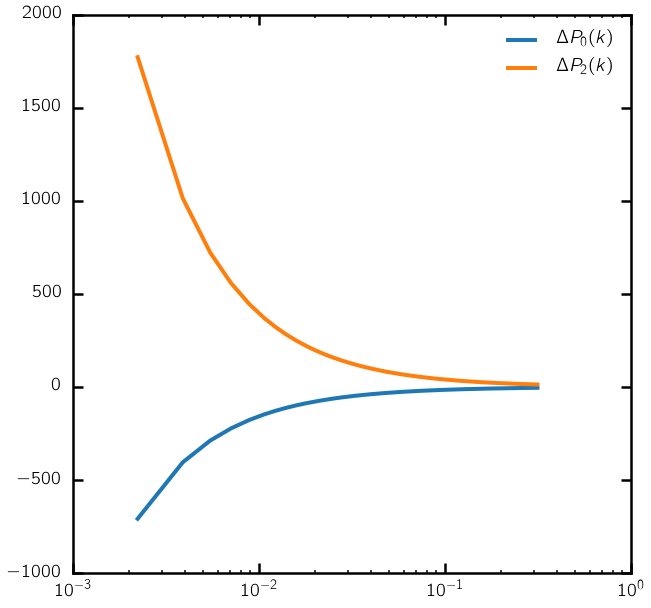

In [17]:
fig2 = plt.figure(2, figsize=(10,10))
sub = fig2.add_subplot(111)

delP0_uncorr = tophat.delP_uncorr(k, 0, fs=1.0, rc=0.4)
delP2_uncorr = tophat.delP_uncorr(k, 2, fs=1.0, rc=0.4)

sub.plot(k, delP0_uncorr, c=pretty_colors[1], label=r"$\Delta P_0(k)$", lw=4)
sub.plot(k, delP2_uncorr, c=pretty_colors[3], label=r"$\Delta P_2(k)$", lw=4)

sub.set_xlim([1e-3, 1.0])
sub.set_xscale('log')

sub.legend(loc='upper right')
plt.show()